# Klasifikacija neuronskim mrežama

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Upoznavanje sa podacima

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
np.unique(test_labels)  

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

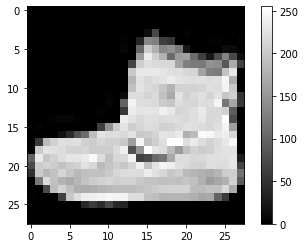

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.grid(False);
plt.show()

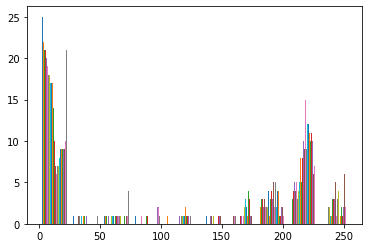

In [ ]:
_ = plt.hist(train_images[0])

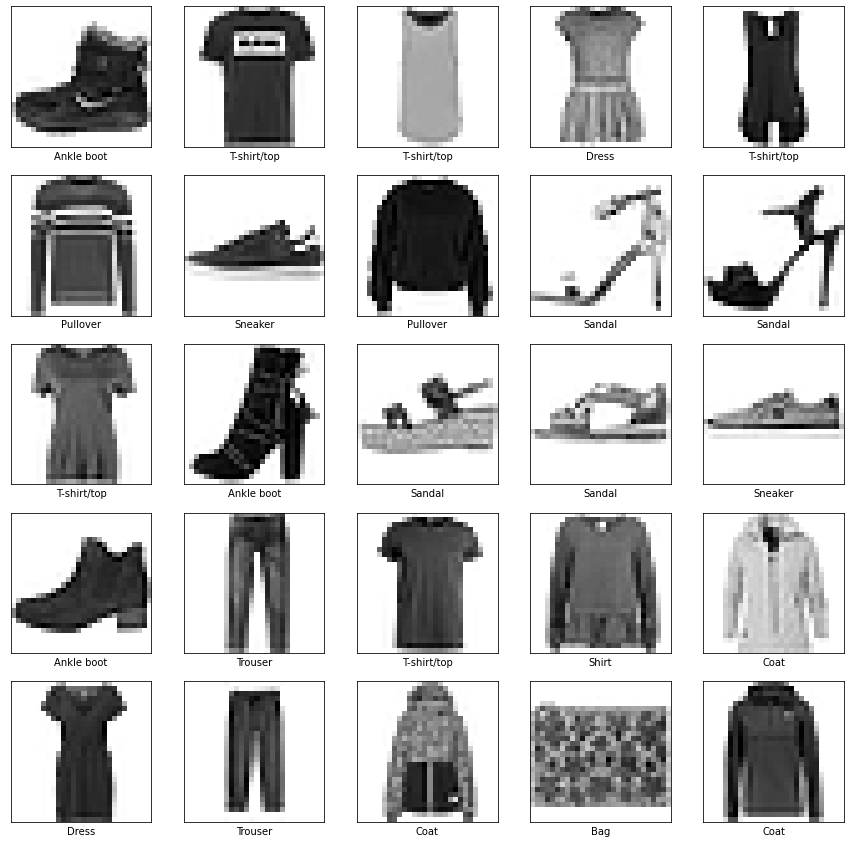

In [ ]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i] , cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

## Preprocesiranje podataka

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

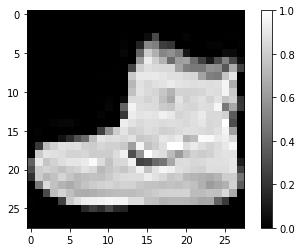

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap="gray")
plt.colorbar()
plt.show()

In [ ]:
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

In [ ]:
train_labels_cat[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

## Treniranje modela

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss = keras.losses.CategoricalCrossentropy() ,
              metrics = ["accuracy"])

model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5075 - accuracy: 0.8221
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3407 - accuracy: 0.8746
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2680 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2474 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.238

## Evaluacija modela

In [ ]:
test_loss , test_acc = model.evaluate(test_images, test_labels_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8841


In [ ]:
test_loss

0.3438432514667511

In [ ]:
test_acc

0.8841000199317932

## Koriscenje modela

In [ ]:
predictions = model.predict(test_images)
predictions = [class_names[np.argmax(p)] for p in predictions]
predictions[:10]

['Ankle boot',
 'Pullover',
 'Trouser',
 'Trouser',
 'Shirt',
 'Trouser',
 'Coat',
 'Shirt',
 'Sandal',
 'Sneaker']

## Vizualizacija performanse modela

In [ ]:
def plot_image(prediction_array, true_label, image):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap=plt.cm.binary)

  prediction_label = np.argmax(prediction_array)
  plt.xlabel(f"{class_names[prediction_label]} {np.max(prediction_array):.2f}% ({class_names[true_label]})") 

def plot_predictions(prediction_array, true_label):
  
  plt.ylim([0,1])
  plt.yticks([])
  plt.xticks(range(10))
  thisplot = plt.bar(range(10), prediction_array)

  prediction_label = np.argmax(prediction_array)
  thisplot[prediction_label].set_color("red")
  thisplot[true_label].set_color("green")

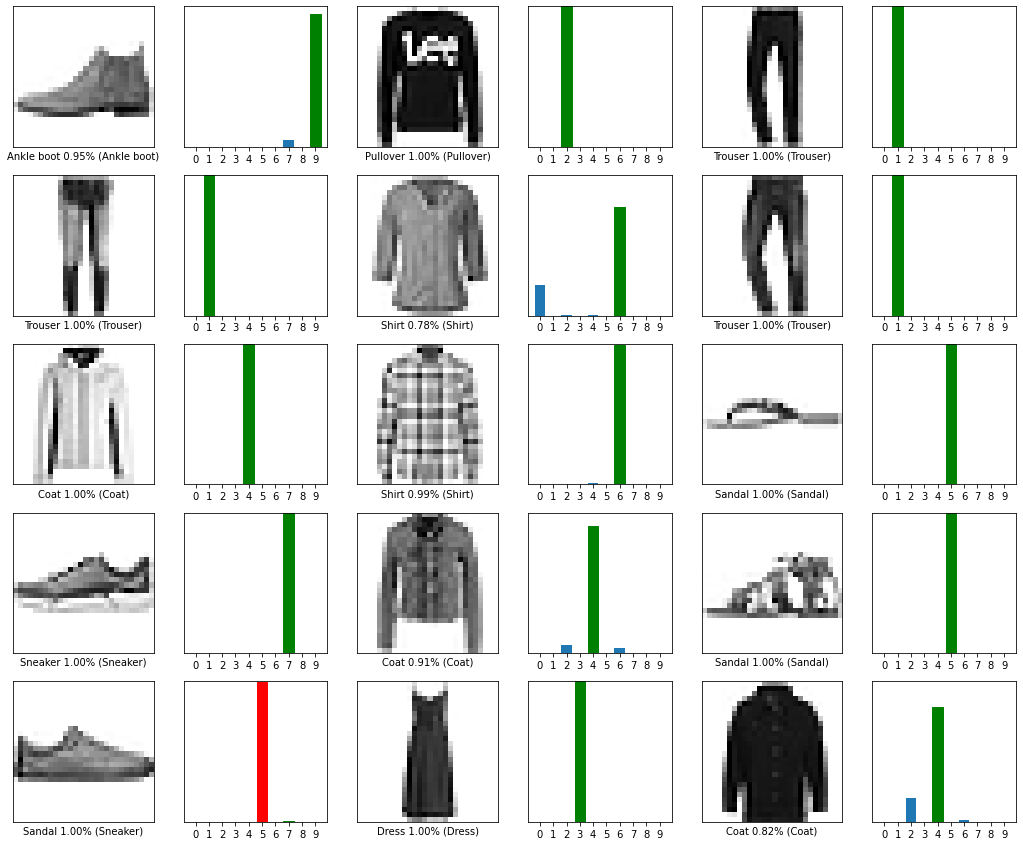

In [ ]:
predictions = model.predict(test_images)

num_rows = 5
num_columns = 3

num_images = num_rows * num_columns

plt.figure(figsize=(2*3 * num_columns, 3 * num_rows))
for pred_inx , pred in enumerate(predictions[:15]):
  plt.subplot(num_rows , 2 * num_columns , 2 * pred_inx + 1)
  plot_image(pred, test_labels[pred_inx], test_images[pred_inx])
  plt.subplot(num_rows , 2 * num_columns, 2 * pred_inx + 2)
  plot_predictions(pred, test_labels[pred_inx])

plt.tight_layout
plt.show() 

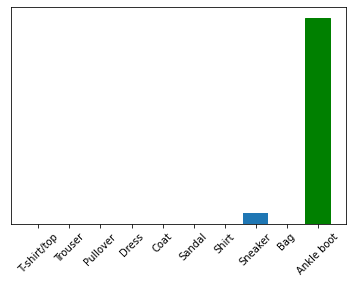

In [ ]:
img = test_images[0]
img = (np.expand_dims(img, 0))
single_predict = model.predict(img)
plot_predictions(single_predict[0], test_labels[0])
_ = plt.xticks(range(10), class_names, rotation=45)